In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [30]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore a specific category of warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

**1. Data Description**

In [31]:
data=pd.read_csv("Gene Expression Analysis and Disease Relationship.csv")
data

,PatientID,Age,Gender,Gene_X_Expression,Gene_Y_Expression,SmokingStatus,DiseaseStatus,TreatmentResponse
0,1,45,0,5.78,3.21,1,1,1
1,2,62,1,7.12,5.89,2,2,0
2,3,38,0,3.15,1.98,0,0,2
3,4,55,1,6.54,4.76,1,1,1
4,5,71,0,8.01,6.55,2,2,0
...,...,...,...,...,...,...,...,...
995,996,38,1,2.62,2.41,0,0,2
996,997,39,0,2.73,2.52,0,0,2
997,998,40,1,2.84,2.63,0,0,2
998,999,41,0,2.95,2.74,0,0,2


In [32]:
data.isnull().sum()

PatientID            0
Age                  0
Gender               0
Gene_X_Expression    0
Gene_Y_Expression    0
SmokingStatus        0
DiseaseStatus        0
TreatmentResponse    0
dtype: int64

In [33]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Gene_X_Expression', 'Gene_Y_Expression',
       'SmokingStatus', 'DiseaseStatus', 'TreatmentResponse'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Gender             1000 non-null   int64  
 3   Gene_X_Expression  1000 non-null   float64
 4   Gene_Y_Expression  1000 non-null   float64
 5   SmokingStatus      1000 non-null   int64  
 6   DiseaseStatus      1000 non-null   int64  
 7   TreatmentResponse  1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [35]:
data.describe()

,PatientID,Age,Gender,Gene_X_Expression,Gene_Y_Expression,SmokingStatus,DiseaseStatus,TreatmentResponse
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.631000,0.50000,3.92314,3.62837,0.058000,0.058000,1.942000
std,288.819436,17.608774,0.50025,2.00056,1.94636,0.307784,0.307784,0.307784
min,1.000000,20.000000,0.00000,0.51000,0.30000,0.000000,0.000000,0.000000
25%,250.750000,34.000000,0.00000,2.19750,1.95000,0.000000,0.000000,2.000000
50%,500.500000,49.000000,0.50000,3.88500,3.58500,0.000000,0.000000,2.000000
75%,750.250000,65.000000,1.00000,5.61250,5.33000,0.000000,0.000000,2.000000
max,1000.000000,80.000000,1.00000,9.01000,7.55000,2.000000,2.000000,2.000000


In [36]:
len(data)

1000

In [37]:
data.shape

(1000, 8)

**2. Exploratory Data Analysis( EDA)**

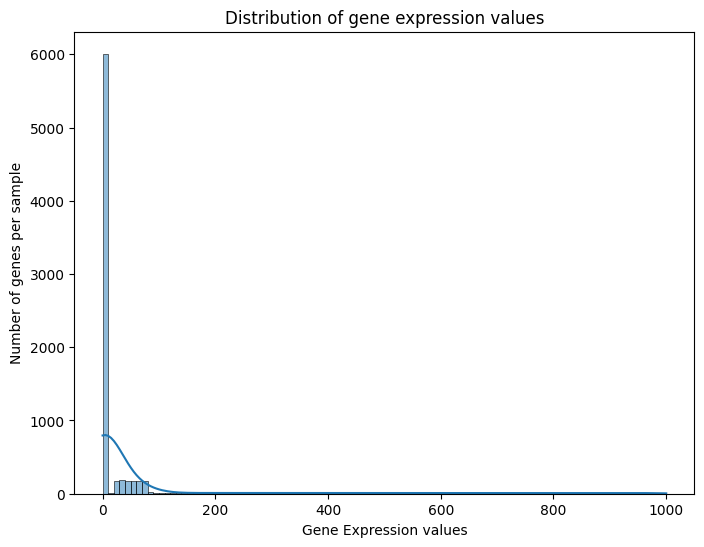

In [38]:
#Summary of expression values
plt.figure(figsize=(8,6))
sns.histplot(data.values.flatten(), bins=100, kde=True)
plt.title("Distribution of gene expression values")
plt.xlabel("Gene Expression values")
plt.ylabel("Number of genes per sample")
plt.show()

The gene expression distribution is heavily right-skewed, with most values concentrated between 0-20 and a long tail extending to approximately 1000, representing a few highly expressed genes. This pattern is common in transcriptomics, where most genes exhibit low expression, while a small subset display very high expression. 


In [39]:
data_log = np.log2(data + 1)

In [40]:
data_log

,PatientID,Age,Gender,Gene_X_Expression,Gene_Y_Expression,SmokingStatus,DiseaseStatus,TreatmentResponse
0,1.000000,5.523562,0.0,2.761285,2.073820,1.000000,1.000000,1.000000
1,1.584963,5.977280,1.0,3.021480,2.784504,1.584963,1.584963,0.000000
2,2.000000,5.285402,0.0,2.053111,1.575312,0.000000,0.000000,1.584963
3,2.321928,5.807355,1.0,2.914565,2.526069,1.000000,1.000000,1.000000
4,2.584963,6.169925,0.0,3.171527,2.916477,1.584963,1.584963,0.000000
...,...,...,...,...,...,...,...,...
995,9.961450,5.285402,1.0,1.855990,1.769772,0.000000,0.000000,1.584963
996,9.962896,5.321928,0.0,1.899176,1.815575,0.000000,0.000000,1.584963
997,9.964341,5.357552,1.0,1.941106,1.859970,0.000000,0.000000,1.584963
998,9.965784,5.392317,0.0,1.981853,1.903038,0.000000,0.000000,1.584963


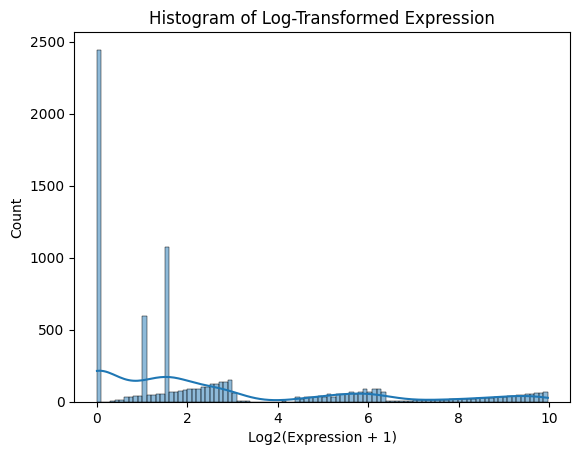

In [41]:
# Distribution of all expression values
sns.histplot(data_log.values.flatten(), bins=100, kde=True)
plt.title("Histogram of Log-Transformed Expression")
plt.xlabel("Log2(Expression + 1)")
plt.show()

Now the data is normalized since values ranges from 0 to 10

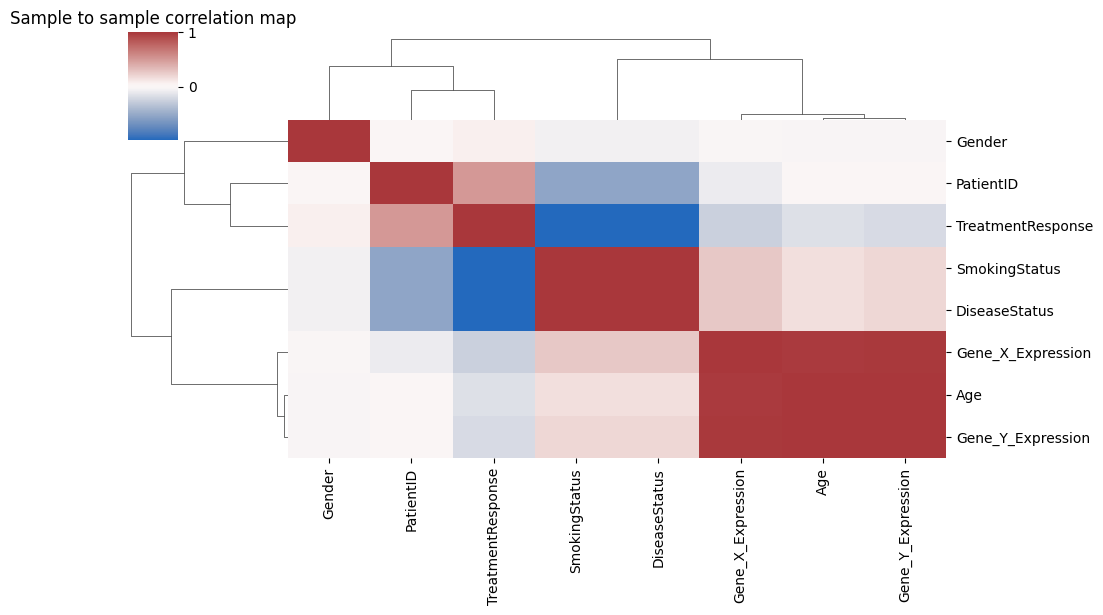

In [42]:
corr= data_log.corr()
sns.clustermap(corr, cmap='vlag', figsize=(10,6))
plt.title("Sample to sample correlation map")
plt.show()

In [43]:
#PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = data_log.T  
X_scaled = StandardScaler().fit_transform(X)

In [44]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(pcs, columns=["PC1", "PC2"], index=X.index)

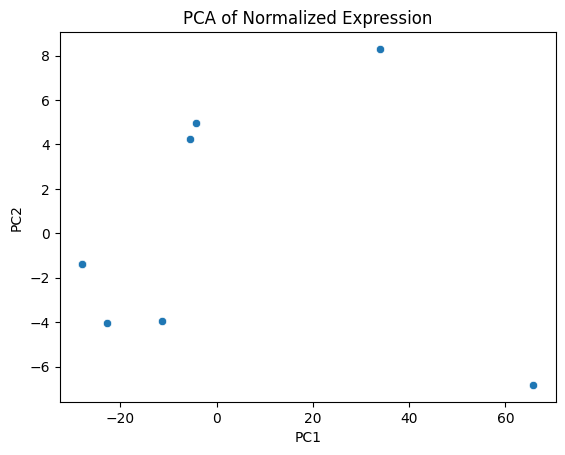

In [45]:
sns.scatterplot(data=pc_df, x="PC1", y="PC2")
plt.title("PCA of Normalized Expression")
plt.show()

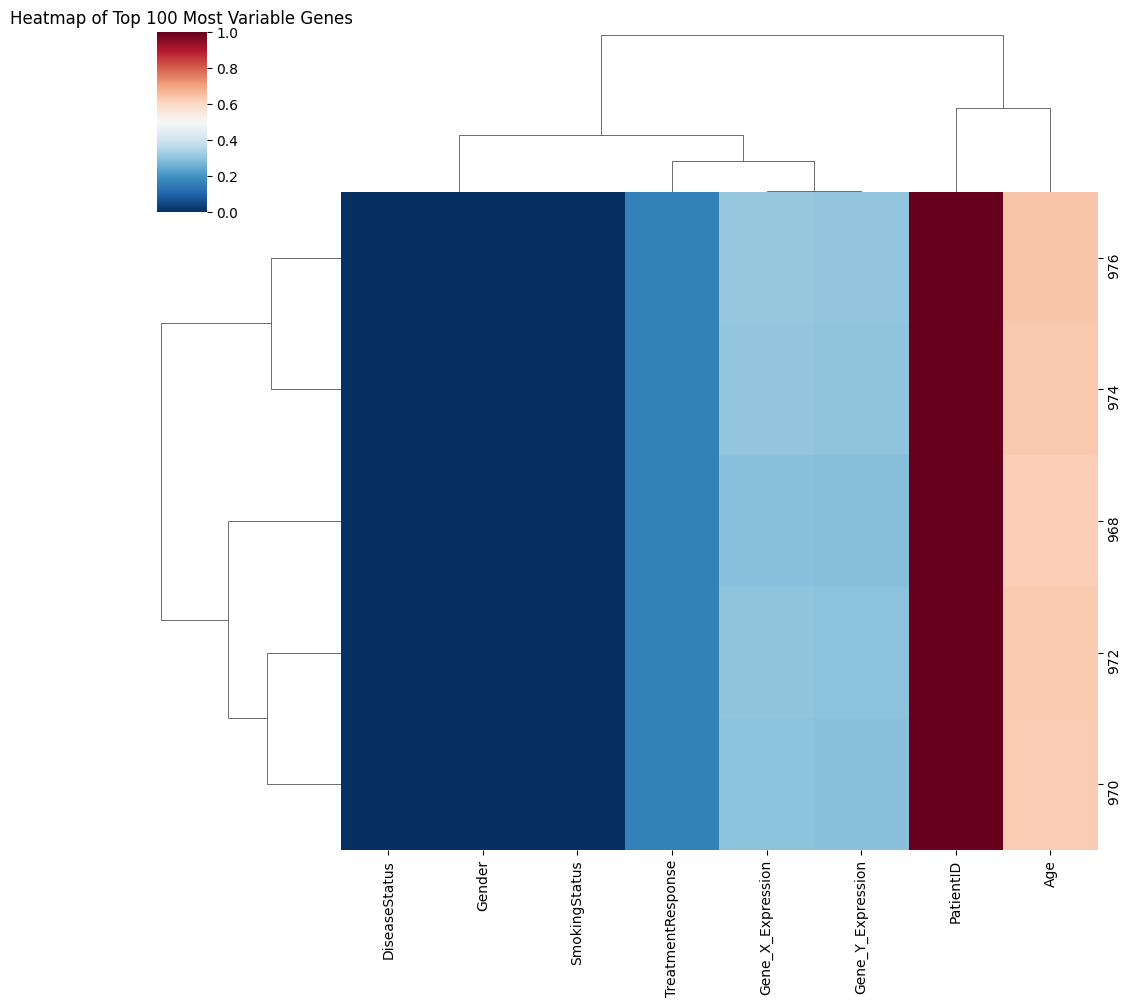

In [46]:
#top variable genes - which genes are most informative for classification
top_genes=data_log.var(axis=1).sort_values(ascending=False).head()
top_genes=data_log.loc[top_genes.index]
sns.clustermap(top_genes, cmap='RdBu_r', standard_scale=0)
plt.title("Heatmap of Top 100 Most Variable Genes")
plt.show()

In [47]:
from scipy.stats import zscore
z = zscore(data_log.T, axis=1)  
outlier_scores = np.abs(z).mean(axis=1)
outliers = outlier_scores > 3  
print("Potential outlier samples:", data_log.columns[outliers])


Potential outlier samples: Index([], dtype='object')


In [48]:
data_log.columns

Index(['PatientID', 'Age', 'Gender', 'Gene_X_Expression', 'Gene_Y_Expression',
       'SmokingStatus', 'DiseaseStatus', 'TreatmentResponse'],
      dtype='object')

**3. Model traing, testing and Evaluation**

In [49]:
y = data['DiseaseStatus']       
X = data_log.drop(
    ['PatientID', 'Age', 'Gender', 'SmokingStatus', 'DiseaseStatus', 'TreatmentResponse'],
    axis=1, errors='ignore'
)

In [50]:
X.shape

(1000, 2)

In [51]:
y.shape


(1000,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [53]:
X_train.shape,y_train.shape

((750, 2), (750,))

In [54]:
X_test.shape,y_test.shape

((250, 2), (250,))

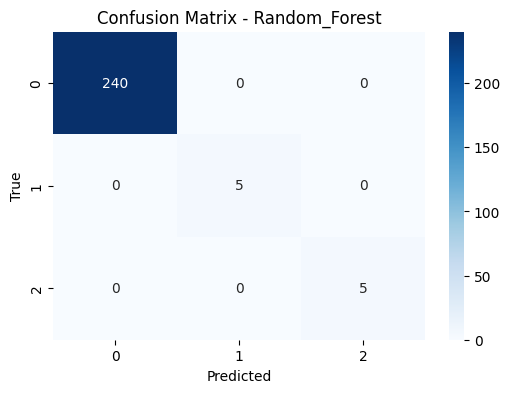

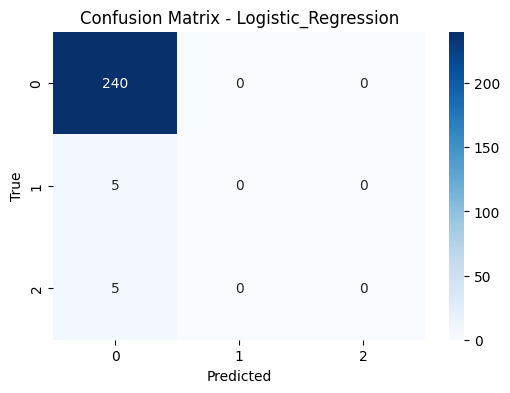

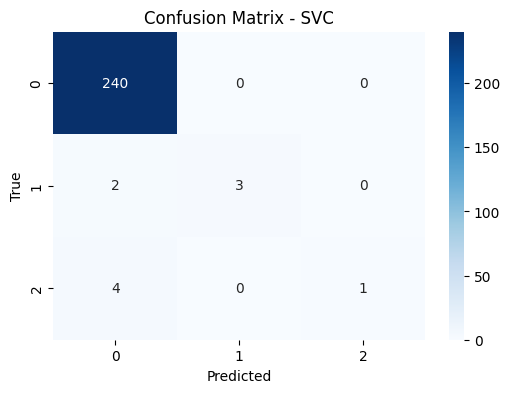

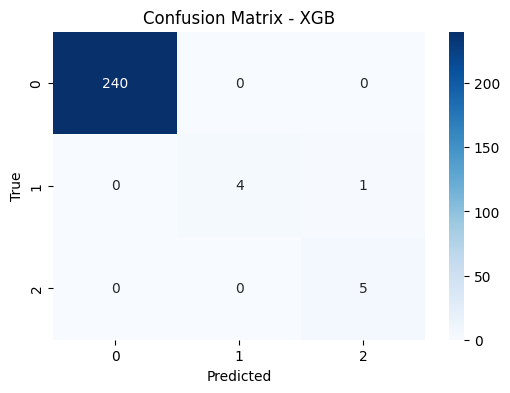

                 Model  Accuracy  Precision  Recall  F1-score
0        Random_Forest     1.000   1.000000   1.000  1.000000
1  Logistic_Regression     0.960   0.921600   0.960  0.940408
2                  SVC     0.976   0.976585   0.976  0.969815
3                  XGB     0.996   0.996667   0.996  0.995960


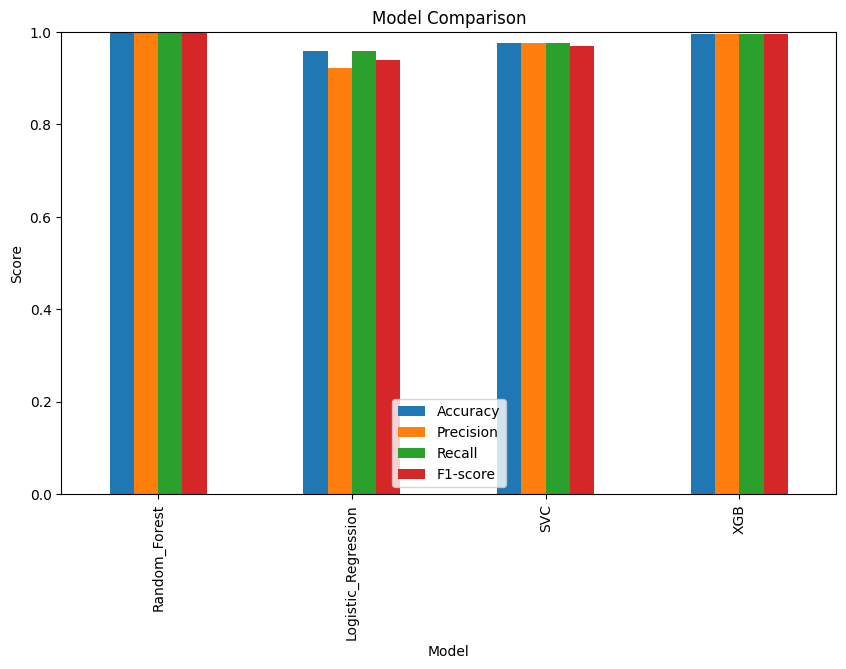

In [55]:
models = ["Random_Forest","Logistic_Regression","SVC","XGB","LGB"]

classifiers = [
    RandomForestClassifier(random_state=42),  
    LogisticRegression(max_iter=1000, random_state=42),
    SVC(probability=True, random_state=42),
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
]

results = []

for model_name, clf in zip(models, classifiers):

    clf.fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)
  
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index("Model")[["Accuracy","Precision","Recall","F1-score"]].plot.bar(figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in zip(models, classifiers):
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    print(f"{name}: {acc.mean():.4f} ± {acc.std():.4f}")


Random_Forest: 0.9970 ± 0.0024
Logistic_Regression: 0.9650 ± 0.0032
SVC: 0.9720 ± 0.0075
XGB: 0.9940 ± 0.0037


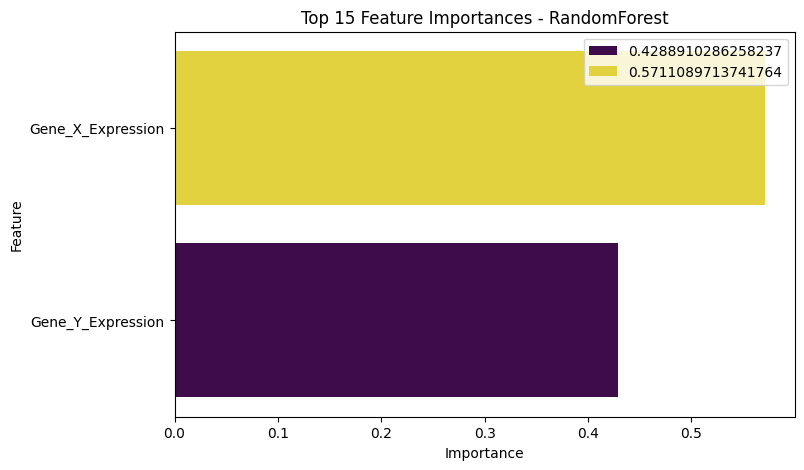

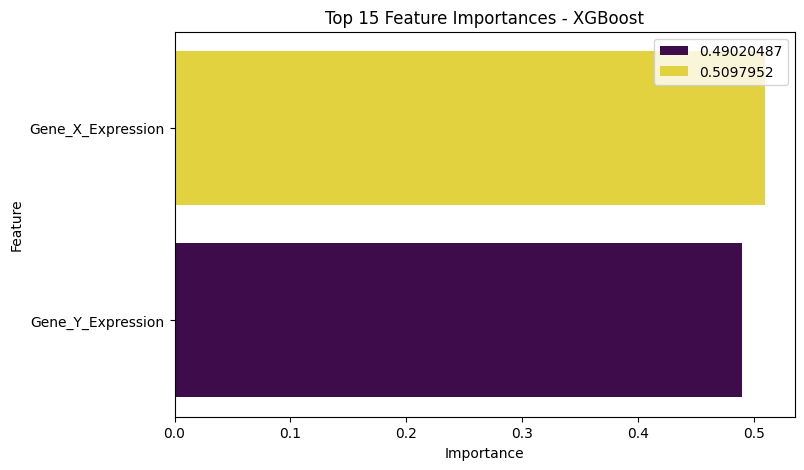

In [57]:
feature_names = X.columns
tree_models = {"RandomForest": classifiers[0], "XGBoost": classifiers[3]}

for name, model in tree_models.items():
    model.fit(X, y)
    
    if not hasattr(model, "feature_importances_"):
        continue
     
    fi = pd.Series(model.feature_importances_, index=feature_names).nlargest(15)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=fi.values, y=fi.index, hue=fi.values, palette="viridis")
    plt.title(f"Top 15 Feature Importances - {name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


Gene X expression is more predictive of disease status than Gene Y, which could guide to more innovative research in future.